In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Import our datasets

In [10]:
#import and read the data
df = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Explore and clean the data

In [11]:
#checking data for null values
df.isnull().sum().sort_values(ascending = False).head(25)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
dtype: int64

In [12]:
#further explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [13]:
# Remove with too many null values that seem to be poor predictors
df = df.drop(labels=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'],axis=1)
test = test.drop(labels=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'],axis=1)

In [14]:
df.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000


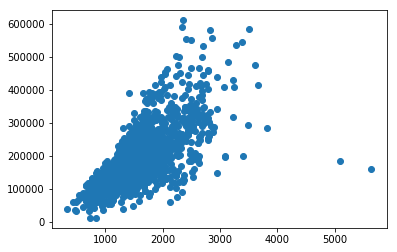

In [17]:
# per dataset hints I want to remove the initial outliers
plt.scatter(df['Gr Liv Area'],df['SalePrice']);

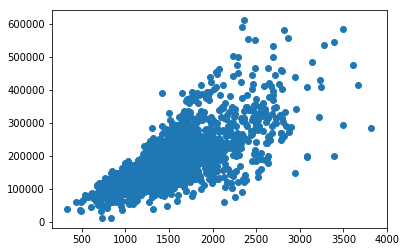

In [18]:
# dropping outliers and boucle checking our data
df = df[df['Gr Liv Area']< 4000]
plt.scatter(df['Gr Liv Area'],df['SalePrice']);

    Clean up the names of the columns to make them easier to work with going forward

In [19]:
# Cleaning up the names of the columns to make them easier to work with going forward
df.columns = [i.lower().replace(' ', '_') for i in df.columns]
test.columns = [i.lower().replace(' ', '_') for i in test.columns]
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'g

In [20]:
# Checking the overview of the numberical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2049.0,1.473676e+03,8.442481e+02,1.0,753.0,1481.0,2.199000e+03,2930.0
pid,2049.0,7.134001e+08,1.886859e+08,526301100.0,528458130.0,535453160.0,9.071760e+08,924152030.0
ms_subclass,2049.0,5.702538e+01,4.283727e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1719.0,6.887900e+01,2.247211e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2049.0,1.002468e+04,6.608512e+03,1300.0,7500.0,9405.0,1.150000e+04,159000.0
overall_qual,2049.0,6.108346e+00,1.421780e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2049.0,5.562714e+00,1.104897e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2049.0,1.971673e+03,3.017129e+01,1872.0,1953.0,1974.0,2.001000e+03,2010.0
year_remod/add,2049.0,1.984166e+03,2.103279e+01,1950.0,1964.0,1993.0,2.004000e+03,2010.0
mas_vnr_area,2027.0,9.879773e+01,1.725638e+02,0.0,0.0,0.0,1.600000e+02,1600.0


In [22]:
# fixing the garage year built from 2207 to most likely value of 2007
df[['garage_yr_blt']].sort_values('garage_yr_blt',ascending = False).head(30)
df.loc[[1699],['garage_yr_blt']] = 2007

In [14]:
df.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000


In [15]:
test.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,100,24,0,0,0,0,0,9,2006,New


In [24]:
test.shape

(879, 75)

In [25]:
# Exporting cleaned data for EDA
df.to_csv('datasets/train_clean.csv', index = False)
test.to_csv('datasets/test_clean.csv', index = False)